# Predicting Appetite in CKD Patients using Logistic Regression

In [5]:
import importlib
import subprocess
import sys

def install_if_missing(package, import_name=None):
    try:
        importlib.import_module(import_name or package)
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of packages (install_name, import_name)
packages = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scikit-learn", "sklearn"),
    ("joblib", "joblib"),
]

# Install as needed
for pkg, imp in packages:
    install_if_missing(pkg, imp)

Import Libraries (After pip installing them)

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os

sns.set(style="whitegrid")


## Load Data

In [7]:
# Load cleaned dataset
df = pd.read_csv("../data/clean/kidney_disease_cleaned.csv")

# Check unique values in Appetite
print("Appetite values:", df['Appetite'].unique())


Appetite values: ['good' 'poor' nan]


## Preprocessing

In [8]:
# Drop rows with missing target
df = df.dropna(subset=["Appetite"])

# Encode the target column
le = LabelEncoder()
df["Appetite_Encoded"] = le.fit_transform(df["Appetite"])  # 'good' -> 1, 'poor' -> 0

# Select features
features = [
    "Age", "Blood_Pressure", "Albumin", "Sugar", "Packed_Cell_Volume",
    "White_Blood_Cell_Count", "Red_Blood_Cell_Count", "Hemoglobin",
    "Sodium", "Potassium", "Serum_Creatinine", "Blood_Urea",
    "Blood_Glucose_Random"
]

features = [f for f in features if f in df.columns]
df[features] = df[features].fillna(df[features].median())

X = df[features]
y = df["Appetite_Encoded"]


## Target Distribution

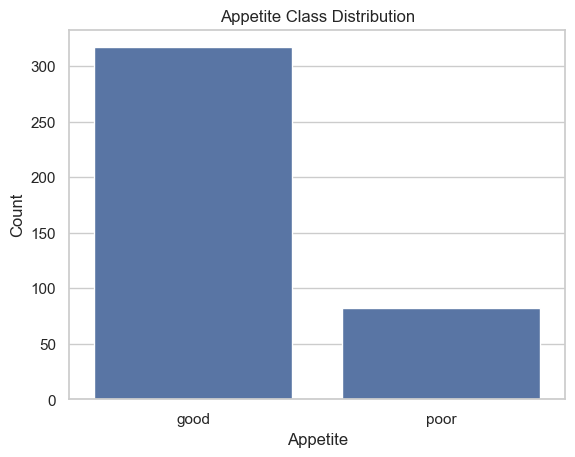

In [9]:
sns.countplot(x="Appetite", data=df)
plt.title("Appetite Class Distribution")
plt.xlabel("Appetite")
plt.ylabel("Count")
plt.show()


## Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Logistic Regression Model

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Evaluation

Confusion Matrix:
[[59  5]
 [12  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.44      0.25      0.32        16

    accuracy                           0.79        80
   macro avg       0.64      0.59      0.60        80
weighted avg       0.75      0.79      0.76        80



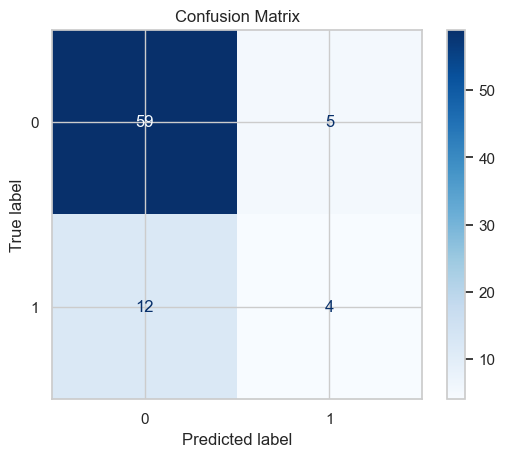

In [12]:
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Feature Importance

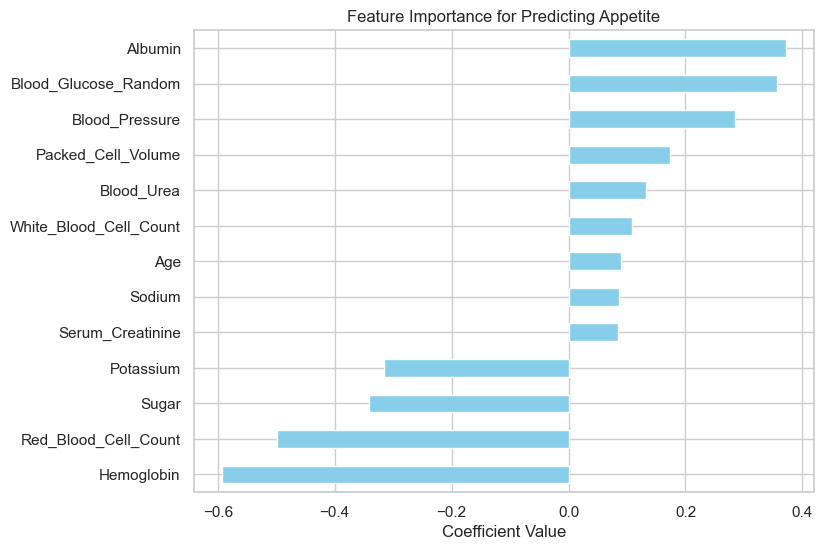

In [13]:
importance = pd.Series(model.coef_[0], index=features).sort_values()

plt.figure(figsize=(8, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance for Predicting Appetite")
plt.xlabel("Coefficient Value")
plt.show()


## Save Model

In [ ]:
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/appetite_model.joblib")
joblib.dump(scaler, "../models/appetite_scaler.joblib")
print("Model and scaler saved to 'models' folder")


Model and scaler saved in /models
